<a href="https://colab.research.google.com/github/jong104b-kr/AIFFEL_quest_cr/blob/master/CNN_quiz_05_20250211.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 148ms/step - accuracy: 0.8426 - loss: 0.5455 - val_accuracy: 0.9718 - val_loss: 0.0922
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 107ms/step - accuracy: 0.9780 - loss: 0.0726 - val_accuracy: 0.9832 - val_loss: 0.0567
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 106ms/step - accuracy: 0.9857 - loss: 0.0466 - val_accuracy: 0.9857 - val_loss: 0.0483
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.9897 - loss: 0.0319 - val_accuracy: 0.9849 - val_loss: 0.0545
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.9913 - loss: 0.0256 - val_accuracy: 0.9862 - val_loss: 0.0446
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 107ms/step - accuracy: 0.9931 - loss: 0.0218 - val_accuracy: 0.9901 - val_loss: 0.0382
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.9957 - loss: 0.0140 - val_accuracy: 0.9874 - val_loss: 0.0468
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 99ms/step - accuracy: 0.9959 - loss: 0.

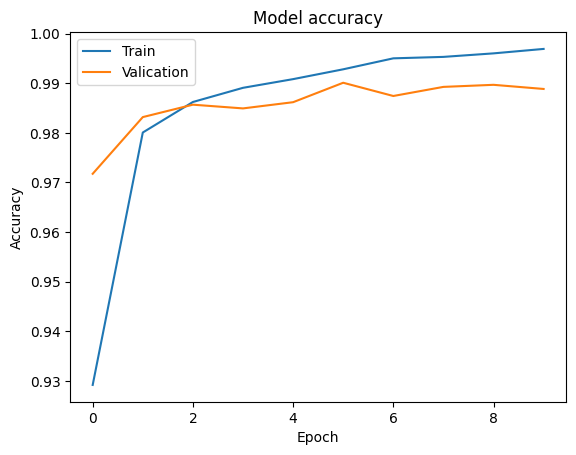

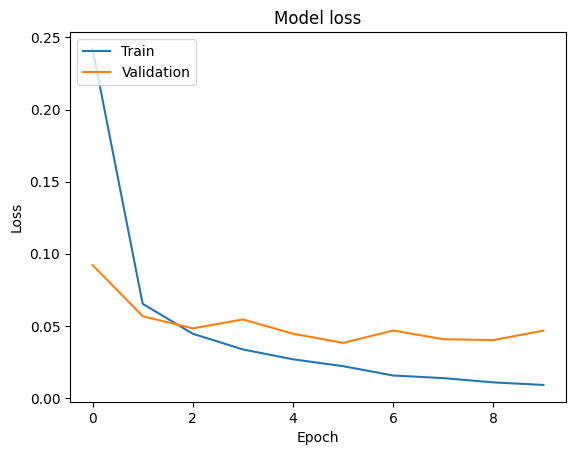

In [ ]:
# 필요한 라이브러리 임포트
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

#MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#데이터 전처리
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

#모델 생성
model = Sequential()

#첫 번째 합성곱 층
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

#두 번째 합성곱 층
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#플래튼 층
model.add(Flatten())

#완전 연결 층
model.add(Dense(128,activation='relu'))

#출력층
model.add(Dense(10,activation='softmax'))

#모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 학습
history = model.fit(x_train,y_train,batch_size=128,epochs=10,validation_split=0.2)

#모델 평가
score = model.evaluate(x_test,y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#학습결과 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Valication'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

# https://easyjwork.tistory.com/27 참고